Unzipping and adding the data to a pandas dataframe

In [164]:
import numpy as np

In [165]:
import zipfile
import pandas as pd
z = zipfile.ZipFile("../data/vehicles.zip")
z.extractall()

vehicles = pd.read_csv("vehicles.csv")
vehicles_backup = vehicles

Remove un-needed columns

In [166]:
vehicles = vehicles.drop(['id','region_url', 'url', 'condition', 'VIN', 'drive', 'size', 'county'], axis=1)


In [167]:
# see how much data is missing
print(vehicles.isna().sum() / vehicles.shape[0] * 100)
vehicles = vehicles.dropna()

region           0.000000
price            0.000000
year             0.282281
manufacturer     4.133714
model            1.236179
cylinders       41.622470
fuel             0.705819
odometer         1.030735
title_status     1.930753
transmission     0.598763
type            21.752717
paint_color     30.501078
image_url        0.015930
description      0.016398
state            0.000000
lat              1.534155
long             1.534155
posting_date     0.015930
dtype: float64


In [168]:
vehicles.shape

(168890, 18)

In [169]:
vehicles.sample(10)

,region,price,year,manufacturer,model,cylinders,fuel,odometer,title_status,transmission,type,paint_color,image_url,description,state,lat,long,posting_date
426744,wyoming,800,2000.0,cadillac,deville,8 cylinders,gas,100000.0,clean,automatic,coupe,white,https://images.craigslist.org/00f0f_1kOqCs4Ddv...,2000 Cadillac Deville Needs thermostats New ti...,wy,41.439000,-105.801000,2021-04-08T13:26:14-0600
79192,fort collins / north CO,4200,2003.0,ram,1500,8 cylinders,gas,196000.0,clean,automatic,truck,grey,https://images.craigslist.org/00404_1C6LX0elUe...,2003 Dodge RAM 1500 SLT Quad Cab 2X4 – 6ft Bed...,co,39.612300,-104.879900,2021-04-26T08:05:25-0600
17006,yuma,15000,2014.0,chevrolet,camaro,6 cylinders,gas,60000.0,clean,automatic,coupe,black,https://images.craigslist.org/00L0L_dSnX7pp1VU...,Beautifully maintained 2014 Chevrolet Camaro t...,az,32.701500,-114.642400,2021-04-19T18:48:32-0700
155044,south bend / michiana,19700,2014.0,mercedes-benz,e-class,6 cylinders,gas,74056.0,clean,automatic,sedan,grey,https://images.craigslist.org/01717_iE76cGswTM...,2014 Mercedes-Benz E-Class 4dr Sdn E 350 Luxur...,in,41.672666,-86.196093,2021-04-11T15:30:33-0400
337398,pittsburgh,13900,2008.0,ram,1500,8 cylinders,gas,54340.0,rebuilt,automatic,pickup,black,https://images.craigslist.org/00X0X_5Q0XNnB20C...,"Ram Big Horn 1500, excellent condition only 54...",pa,40.321000,-80.039800,2021-04-20T08:53:29-0400
1339,birmingham,3500,2009.0,hyundai,accent,4 cylinders,gas,111387.0,rebuilt,automatic,sedan,white,https://images.craigslist.org/00y0y_dD3T1woWin...,"2009 *Hyundai* *Accent* GLS Sedan - $3,500Call...",al,33.455361,-86.962474,2021-04-13T15:30:21-0500
141403,chicago,3995,2006.0,dodge,charger rt,8 cylinders,gas,178178.0,clean,automatic,sedan,grey,https://images.craigslist.org/00909_i17FX1e6Xa...,2006 Dodge Charger RT SedanExterior Color: Gra...,il,41.572305,-88.113993,2021-05-01T13:12:28-0500
102632,ocala,17990,2016.0,toyota,rav4 hv,4 cylinders,hybrid,115413.0,clean,automatic,SUV,blue,https://images.craigslist.org/01414_aqODKpyNWG...,Ready To Upgrade Your Ride Today? We Make It F...,fl,28.027023,-82.459896,2021-04-26T12:45:23-0400
351189,sioux falls / SE SD,13995,2016.0,ram,promaster city,4 cylinders,gas,89271.0,clean,automatic,other,white,https://images.craigslist.org/00q0q_M6FdiwdA9J...,"2016 Ram ProMaster City Wagon Van 4D - $13,995...",sd,43.556600,-96.802800,2021-04-17T09:06:47-0500
304277,northwest OK,17000,2019.0,chevrolet,cruze,4 cylinders,gas,34075.0,clean,automatic,sedan,silver,https://images.craigslist.org/00d0d_acSOYm0oJM...,This 2019 Chevy Cruze is sure to keep you on t...,ok,36.797381,-98.687525,2021-04-16T08:28:49-0500


In [170]:
vehicles['type'].unique()

array(['pickup', 'truck', 'other', 'coupe', 'mini-van', 'SUV', 'sedan',
       'offroad', 'van', 'convertible', 'hatchback', 'wagon', 'bus'],
      dtype=object)

In [171]:
# drop any listing with no make or model
# dropped = vehicles.dropna(subset=['manufacturer', 'model', 'condition', 'size',])
# print(dropped.shape)

# unique_models = dropped['model'].unique()
# print(len(unique_models))
# cut_model_list = []

# hsm = {}

# for item in unique_models:
#    arr = item.replace('-', '')
#    arr = arr.split(' ', 1)[0]
#    cut_model_list.append(arr)
#    if arr in hsm:
#       hsm[arr] += 1
#    else:
#       hsm[arr] = 1

# nsm = {}

# for item in hsm:
#    if hsm[item] != 1:
#       nsm[item] = hsm[item]
# print(nsm)

# maybe

# print(len(cut_model_list))
# print(len(set(cut_model_list)))
# print(set(cut_model_list))
#print(dropped['model'].unique())
#print(dropped.isna().sum() / dropped.shape[0] * 100)

In [172]:
import matplotlib.pyplot as plt
import seaborn as sns

In [173]:
# Remove the extremes from the prices
lowerPricePercentile = np.percentile(vehicles['price'], 5)
upperPricePercentile = np.percentile(vehicles['price'], 99)
print(lowerPricePercentile, upperPricePercentile)
vehicles = vehicles[vehicles['price'].between(lowerPricePercentile, upperPricePercentile)]

266.0 61590.0


In [174]:
# remove extremes from the odometer
lowerOdometerPercentile = np.percentile(vehicles['odometer'], 5)
upperUpperPercentile = np.percentile(vehicles['odometer'], 99)
print(lowerOdometerPercentile, upperUpperPercentile)
vehicles = vehicles[vehicles['odometer'].between(lowerOdometerPercentile, upperUpperPercentile)]

12000.0 273000.0


In [175]:
vehicles.shape

(149267, 18)

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'year'}>],
       [<Axes: title={'center': 'odometer'}>,
        <Axes: title={'center': 'lat'}>],
       [<Axes: title={'center': 'long'}>, <Axes: >]], dtype=object)

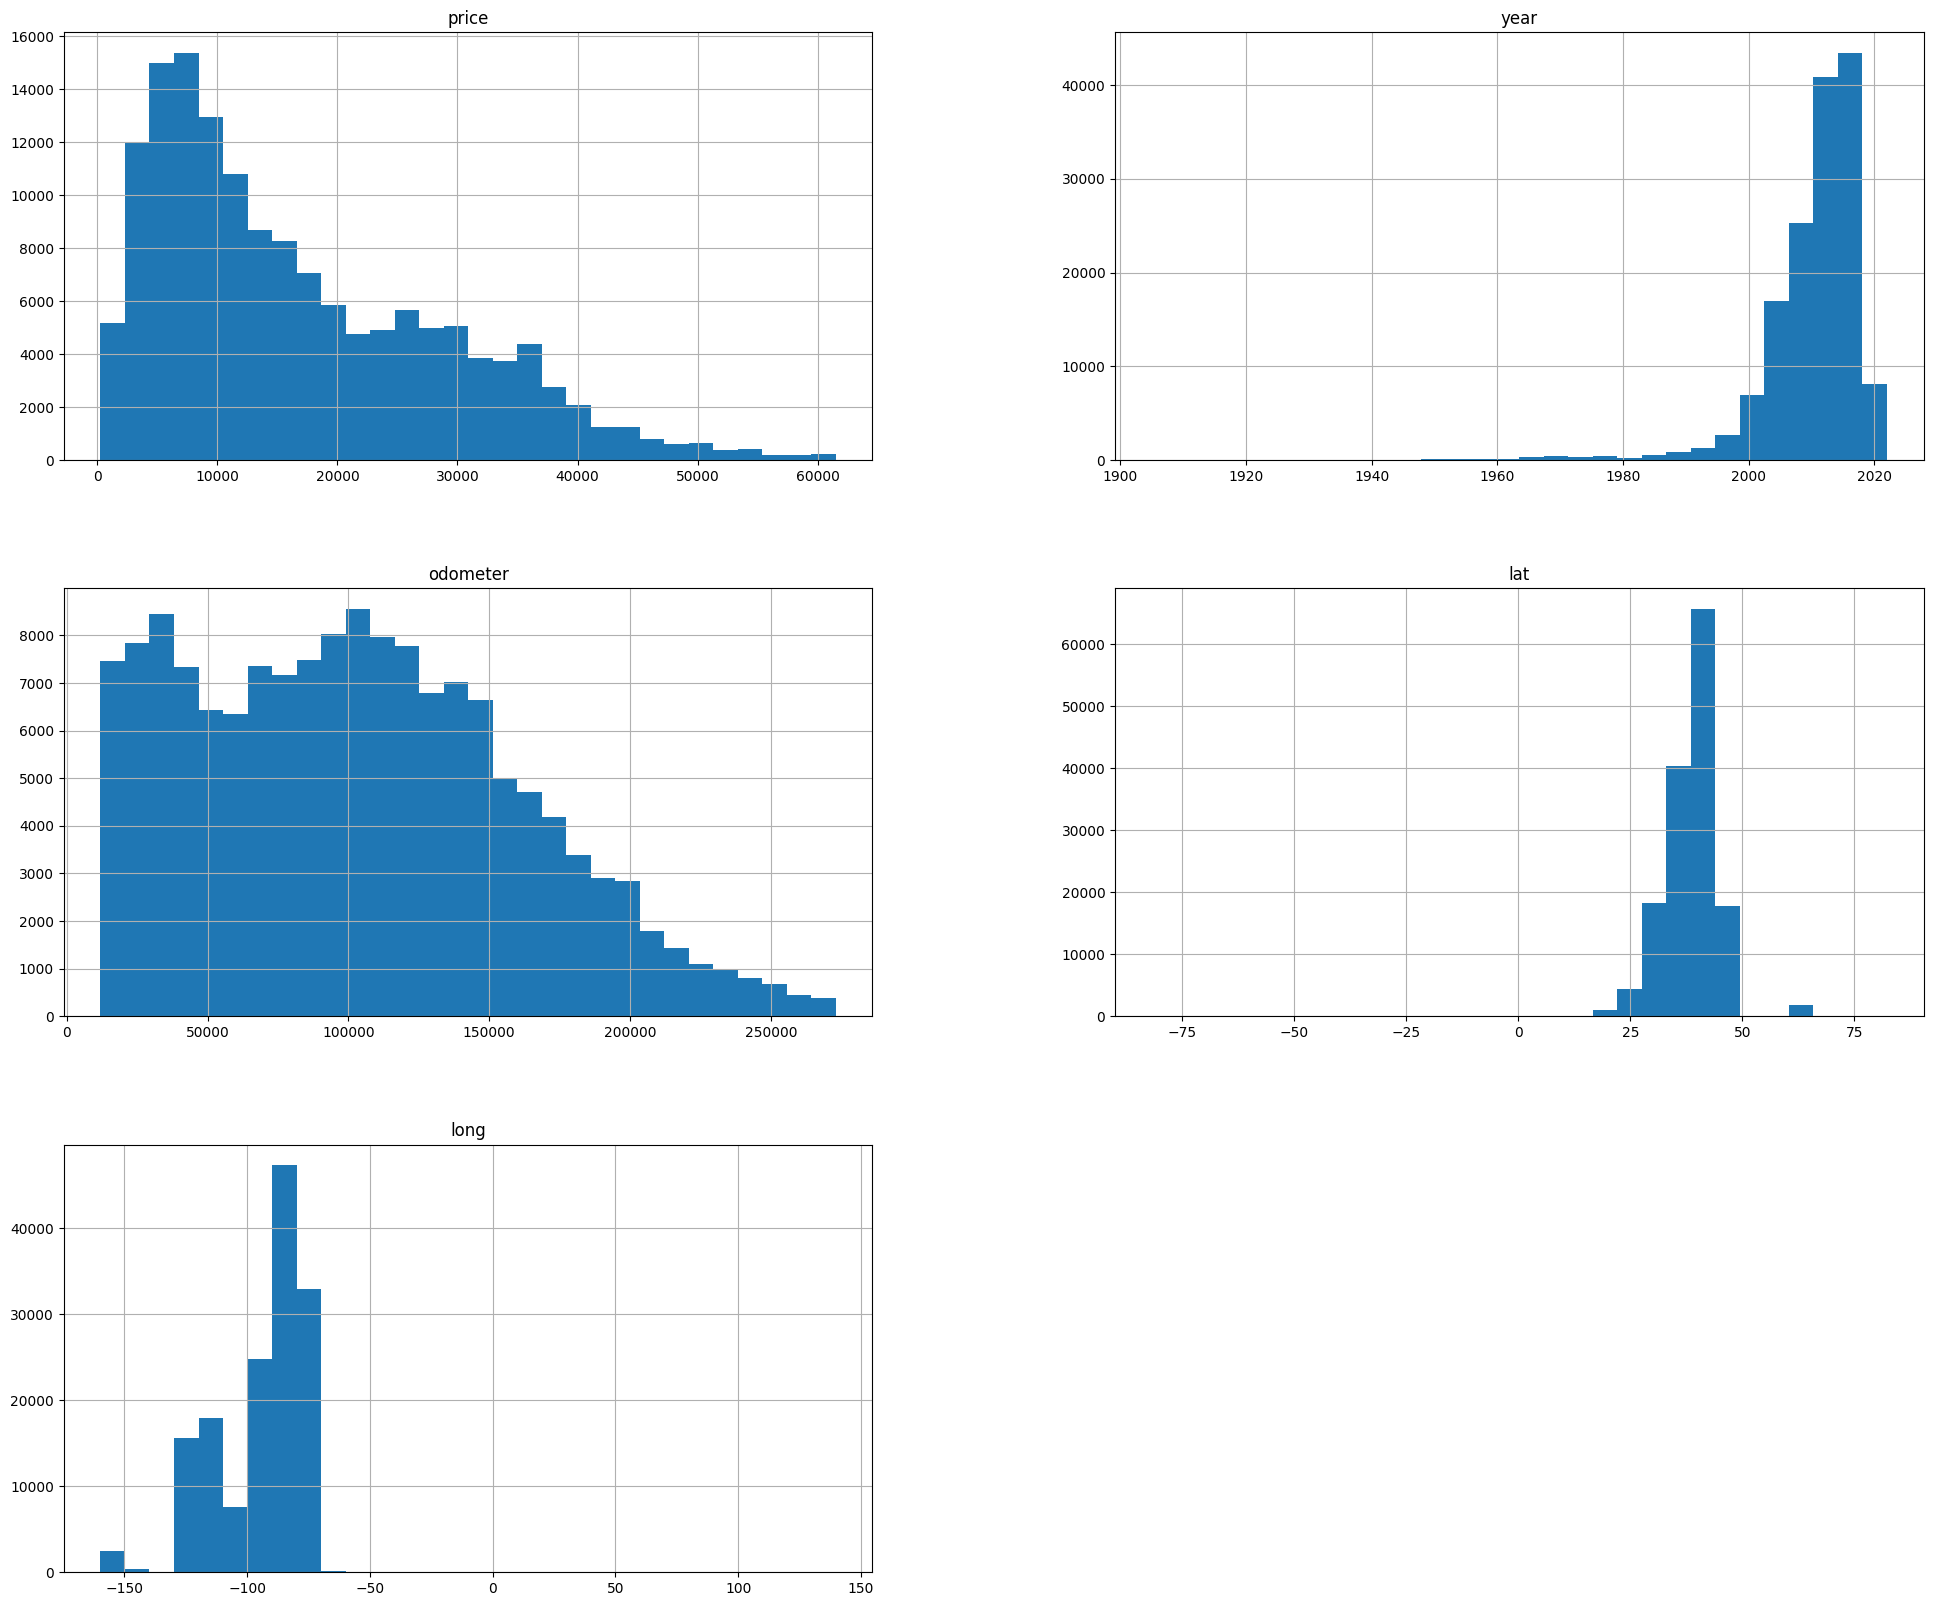

In [176]:
vehicles.hist(figsize=(24,20), bins=30)

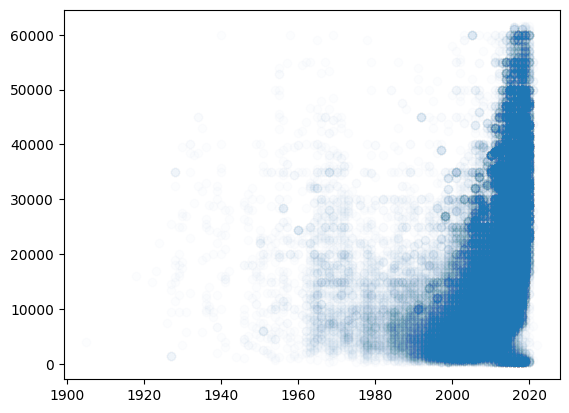

In [180]:
plt.scatter(vehicles['year'], vehicles['price'], alpha=0.01)

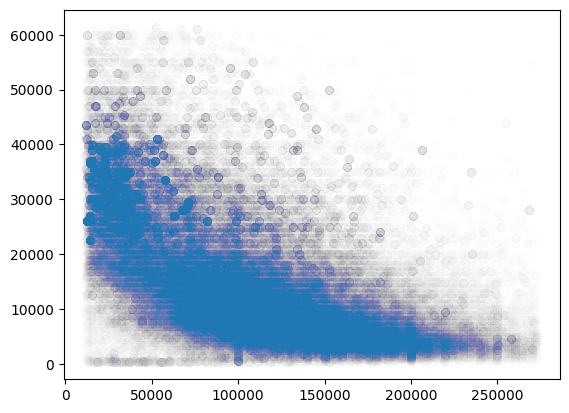

In [178]:
plt.scatter(vehicles['odometer'], vehicles['price'], alpha=0.005)